# List的應用

假設今天我有一個list，我的目標是得到一個list，內容為原本的list的每個element + 1 <br/>
可以用迴圈，例如：

In [3]:
nums = [12, 8, 21, 3, 16]
results_loop = []
for i in nums:
    results_loop.append(i + 1)
results_loop

[13, 9, 22, 4, 17]

然而，迴圈在大數據的時候往往沒有效率，造成大量的計算，因此可以試試看用下列一行程式完成

In [4]:
results_one_row = [num + 1 for num in nums]
results_one_row

[13, 9, 22, 4, 17]

事實上，任何iterable (如list, tuple, dictionary, string, zip, enumerate, range, file connection) 都可以用這樣的方式建立

以range物件為例：

In [5]:
result = [num for num in range(11)]
result

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

$[num + 1 for num in nums]$ 這個可以拆開來看：<br/>
1. num + 1 為 output expression
2. num 為 iterator variable
3. nums 為 iterable

## Nest for loop in list comprehensions

假設今天要產生一個list中含有多個integer pairs (tuple)。每個pair的第一個為0和1，第二個為6和7，程式碼如下：

In [7]:
results_loop = []
for i in range(0,2):
    for j in range(6,8):
        results_loop.append((i, j))
results_loop

[(0, 6), (0, 7), (1, 6), (1, 7)]

In [10]:
results_one_row = [(i, j) for i in range(0,2) for j in range(6,8)]
results_one_row

[(0, 6), (0, 7), (1, 6), (1, 7)]

用list comprehensions 創造一個 5 * 5 的矩陣

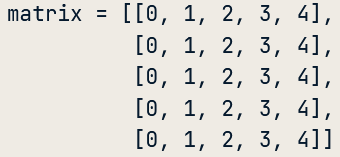

In [11]:
matrix = [[col for col in range(0,5)] for row in range(0,5)]
matrix

[[0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4]]

---

## Conditional comprehensions

題目：算出0到10偶數的平方和

方法一：在iterable後進行condition篩選 (有篩掉不要的element)

In [14]:
results = [x**2 for x in range(0,11) if (x % 2) == 0]
print(results)
print(sum(results))

[0, 4, 16, 36, 64, 100]
220


方法二：在output expression進行條件

In [16]:
results = [x**2 if x % 2 == 0 else 0 for x in range(11)]
print(results)
print(sum(results))

[0, 0, 4, 0, 16, 0, 36, 0, 64, 0, 100]
220


---

# Dictionary Comprehensions

跟list很像，只是list用中括號，dictionary是用大括號

In [18]:
pos_neg = {num : -num for num in range(10)}
pos_neg

{0: 0, 1: -1, 2: -2, 3: -3, 4: -4, 5: -5, 6: -6, 7: -7, 8: -8, 9: -9}

---

# Generator Expressions

考慮一個將0到10乘以2的list comprehension

In [20]:
result = [x*2 for x in range(11)]
result

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

今天將 [] 換成 () 會產生一個generator object

In [21]:
generator = (x*2 for x in range(11))
generator

<generator object <genexpr> at 0x0000012A667FC9C8>

### 解釋
Generators 跟 list comprehensions 幾乎一樣，只是 generators 不會將 lists 存在 memory 中 <br/>
Generators do not construct a list, but is an iterator we can iterate over to produce elements of the list as required

In [24]:
generator = (x*2 for x in range(11))
for i in generator:
    print(i)

0
2
4
6
8
10
12
14
16
18
20


也可以將generator用list()變成list

另外，跟所有的iterator一樣，iterate一次之後就沒了，因此要重新宣告

In [29]:
generator = (x*2 for x in range(11)) 
list(generator)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

也可以用 next 一個一個印出來，或是用 * 全部一次印出來

In [27]:
generator = (x*2 for x in range(11))
next(generator)

0

In [28]:
next(generator)

2

---

## 檢視 list comprehensions 和 generator 的不同

當使用list comprehensions來表示一個很大的list時，因為list太大沒辦法一次放入memory中，因此會跑不出來

In [ ]:
a = [x for x in range(10**1000000)]
a

但是當我用generator來表示相同大小的list時，我馬上就跑完並得到一個generator的物件

In [3]:
a = (x for x in range(10**1000000))
a

<generator object <genexpr> at 0x00000202A01229C8>

In [9]:
print(next(a))

5


當我用 list 或 * 來一次印出所有 a 中的 elements 時，就等於產生一個非常大的list，因此就會跑不出來 (因為記憶體沒那麼大)

In [50]:
a = (x for x in range(10**1000000))
print(list(a))

KeyboardInterrupt: 

In [10]:
a = (x for x in range(10**1000000))
for i in range(100):
    print(next(a))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Generator的物件代表並沒有產生完整的list，但此物件會記錄目前iterate到的index，並只將該index附近的elements放進記憶體中，因此不會占用很多記憶體空間

而且任何list comprehensions都可以變成generators，例如：

In [53]:
results = (x**2 for x in range(0,11) if (x % 2) == 0)
print(list(results))

[0, 4, 16, 36, 64, 100]


---

## Generator Functions

Functions produce generator objects when called

這種函數跟一般的函數是一樣的，一樣用def來定義

唯一不同的是 回傳值不像一般的函數用 **return** ，這裡要回傳 **generator**，因此用 **yield**

例如：

In [55]:
def number_seq(n):
    """Generate values from 1 to n."""
    i = 0
    while i < n:
        yield i
        i += 1

In [56]:
num = number_seq(10)
num

<generator object number_seq at 0x0000012A668327C8>

In [63]:
print(next(num))

6


函數回傳的值為一個generator (也是種iterator)，因此可以用next來取得下一個值。當還未被取用的時候，代表還沒被放進記憶體中，因此減少占用記憶體空間

---

---

# Practice

In [64]:
import pandas as pd
tweet_df = pd.read_csv("dataset/tweets.csv")
tweet_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,filter_level,geo,id,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,NaN,NaN,Tue Mar 29 23:40:17 +0000 2016,"{'hashtags': [], 'user_mentions': [{'screen_na...","{'media': [{'sizes': {'large': {'w': 1024, 'h'...",0,False,low,NaN,714960401759387648,...,NaN,NaN,0,False,"{'retweeted': False, 'text': "".@krollbondratin...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @bpolitics: .@krollbondrating's Christopher...,1459294817758,False,"{'utc_offset': 3600, 'profile_image_url_https'..."
1,NaN,NaN,Tue Mar 29 23:40:17 +0000 2016,"{'hashtags': [{'text': 'cruzsexscandal', 'indi...","{'media': [{'sizes': {'large': {'w': 500, 'h':...",0,False,low,NaN,714960401977319424,...,NaN,NaN,0,False,"{'retweeted': False, 'text': '@dmartosko Cruz ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @HeidiAlpine: @dmartosko Cruz video found.....,1459294817810,False,"{'utc_offset': None, 'profile_image_url_https'..."
2,NaN,NaN,Tue Mar 29 23:40:17 +0000 2016,"{'hashtags': [], 'user_mentions': [], 'symbols...",NaN,0,False,low,NaN,714960402426236928,...,NaN,NaN,0,False,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",Njihuni me Zonjën Trump !!! | Ekskluzive https...,1459294817917,False,"{'utc_offset': 7200, 'profile_image_url_https'..."
3,NaN,NaN,Tue Mar 29 23:40:17 +0000 2016,"{'hashtags': [], 'user_mentions': [], 'symbols...",NaN,0,False,low,NaN,714960402367561730,...,7.149239e+17,7.149239e+17,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Your an idiot she shouldn't have tried to grab...,1459294817903,False,"{'utc_offset': None, 'profile_image_url_https'..."
4,NaN,NaN,Tue Mar 29 23:40:17 +0000 2016,"{'hashtags': [], 'user_mentions': [{'screen_na...",NaN,0,False,low,NaN,714960402149416960,...,NaN,NaN,0,False,"{'retweeted': False, 'text': 'The anti-America...","<a href=""http://twitter.com/download/iphone"" r...",RT @AlanLohner: The anti-American D.C. elites ...,1459294817851,False,"{'utc_offset': -18000, 'profile_image_url_http..."


In [66]:
tweet_time = tweet_df["created_at"]
tweet_time[:10]

0    Tue Mar 29 23:40:17 +0000 2016
1    Tue Mar 29 23:40:17 +0000 2016
2    Tue Mar 29 23:40:17 +0000 2016
3    Tue Mar 29 23:40:17 +0000 2016
4    Tue Mar 29 23:40:17 +0000 2016
5    Tue Mar 29 23:40:17 +0000 2016
6    Tue Mar 29 23:40:18 +0000 2016
7    Tue Mar 29 23:40:17 +0000 2016
8    Tue Mar 29 23:40:18 +0000 2016
9    Tue Mar 29 23:40:18 +0000 2016
Name: created_at, dtype: object

題目：Create a list comprehension that extracts the time from each row in tweet_time. Each row is a string that represents a timestamp, and you will access the 12th to 19th characters in the string to extract the time. Use entry as the iterator variable and assign the result to tweet_clock_time. Remember that Python uses 0-based indexing!

In [68]:
# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time]

# Print the extracted times
print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

題目2：只選擇秒數為19的entries

In [70]:
# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']

# Print the extracted times
print(tweet_clock_time)

['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']
